In [1]:
# This should be roughly the content of the first code cell
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [2]:
# Plotting support
from matplotlib import pyplot as plt
# Standard libraries
import pandas as pd
import sklearn as sk

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from turtle import color
from matplotlib.lines import lineStyles
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures



In [4]:
df = pd.read_csv("fandango_score_comparison.csv")
df

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


problem 8.1


In [5]:
target = 'RottenTomatoes'
feature = 'RottenTomatoes_User'
y = df[target]
y = np.array(y)
df.drop([target], axis = 1, inplace = True)

X = df[feature].to_frame()
X['b_value'] = 1
X = np.array(X)

Use the formula to find the value of  $m$  and  $b$  for       $y = mx+b$
$$
W = (X \cdot T \cdot X)^{-1} \cdot X^{\top} \cdot Y
$$

[  1.17731667 -14.35380306]


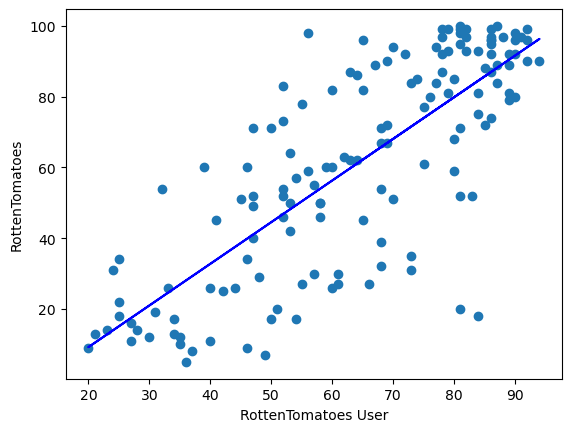

In [6]:
vals = inv(X.T.dot(X)).dot(X.T).dot(y)
print(vals)
m = vals[0]
b = vals[-1]
plt.scatter(df[feature],y)
plt.plot(df[feature], m*df[feature]+b, 'b')
plt.xlabel('RottenTomatoes User')
plt.ylabel('RottenTomatoes')
plt.show()

problem 8.2

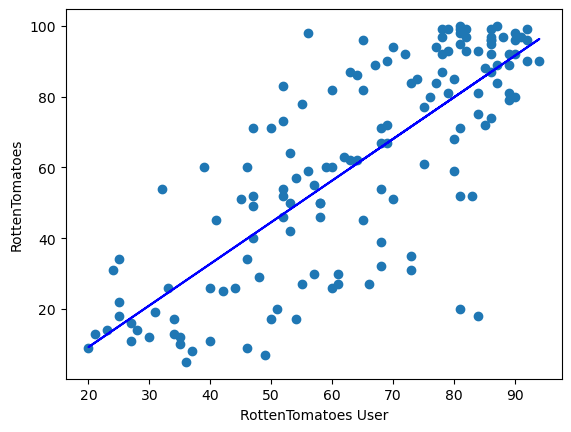

In [7]:
fit_line = LinearRegression()
X = np.array(df[feature]).reshape(-1,1)
fit_line.fit(X,y)
prediction = fit_line.predict(X)
plt.scatter(df[feature],y)
plt.plot(X,prediction, 'b')
plt.xlabel('RottenTomatoes User')
plt.ylabel('RottenTomatoes')
plt.show()



problem 8.3

[-4.52701884e-01  3.07956044e-02 -1.78441179e-04]
11.36416506405979


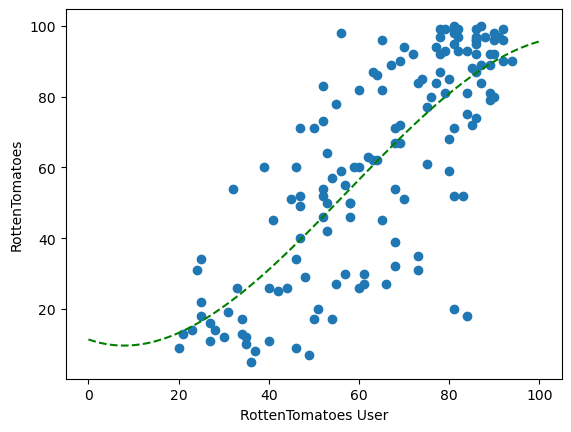

In [8]:

get_poly_form = PolynomialFeatures(degree=3, include_bias=False)
poly_X = get_poly_form.fit_transform(X)
fit_line1 = LinearRegression()
fit_line1.fit(poly_X,y)
predictions = fit_line1.predict(poly_X)

# Define a linspace for 0 to 100, since the scatter above show that X is in 0-100
# Idea here is to plot 100 point to make a smooth line
X_axis = np.linspace(0,100,100)
# Weight of X on Dimention 1 2 3
print(fit_line1.coef_)
# Constant b value
print(fit_line1.intercept_)
y_values = []
# Idea here is to Use x to multiply the weight of x on each dimention then add them up
for i in range(100):
    y_value = (X_axis[i]*fit_line1.coef_[0] + (X_axis[i]**2)*fit_line1.coef_[1] + (X_axis[i]**3)*fit_line1.coef_[2] + fit_line1.intercept_ )
    y_values.append(y_value)

plt.scatter(df[feature],y)
plt.plot(X_axis,y_values,'g--')
plt.xlabel('RottenTomatoes User')
plt.ylabel('RottenTomatoes')
plt.show()

problem 8.4

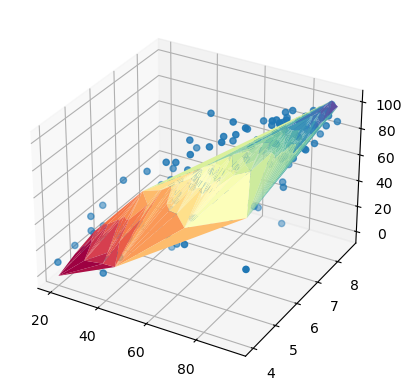

In [9]:
multi_X = df[['RottenTomatoes_User', 'IMDB']]
fit_line2 = LinearRegression()
fit_line2.fit(multi_X,y)
prediction = fit_line2.predict(multi_X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['RottenTomatoes_User'], df['IMDB'],y)
ax.plot_trisurf(df['RottenTomatoes_User'], df['IMDB'], prediction, cmap=plt.cm.Spectral)
plt.show()


    Fandango_Ratingvalue and Fandango_Difference are not useful for predicting which movie is more popular,
    because the Fandango_Stars feature brings the same effect to the prediction as these two features bring to the prediction.

    By comparing the three lambda parameters I found that 0.1 has the best score.

In [10]:

all_X = pd.get_dummies(df)
X_train, X_test, y_train, y_test = train_test_split(all_X, y, test_size=0.3, random_state=0)
fit_line3 = Ridge(alpha= 0.1)
fit_line3.fit(X_train, y_train)
prediction = fit_line3.predict(X_test)
fit_line3.score(X_test,y_test)


0.9989192021056141

In [11]:
fit_line4 = Ridge(alpha= 1)
fit_line4.fit(X_train, y_train)
prediction = fit_line4.predict(X_test)
fit_line4.score(X_test,y_test)

0.9981788631832096

In [12]:
fit_line5 = Ridge(alpha= 2)
fit_line5.fit(X_train, y_train)
prediction = fit_line5.predict(X_test)
fit_line5.score(X_test,y_test)

0.9974306507400931

Sources that help me:   
https://towardsdatascience.com/normal-equation-in-python-the-closed-form-solution-for-linear-regression-13df33f9ad71
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.01-2D-Plotting.html    
https://matplotlib.org/stable/gallery/mplot3d/trisurf3d_2.html